# Problem definition

## Assume 2 players are playing tennis. The probability of Player 1 winning a point is $p$. What is the probability that Player 1 will win the game?

#### Imports

In [22]:
import math

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Problem solution

To solve this problem we will consider two outcomes:
1. The probability of Player 1 winning the game without the game going to a draw.
1. The probability of Player 1 winning the game given the game went to a draw.

The final solution will be the total probability of the two above events as per the total probability law:
\begin{equation}
    P(win) = P(win|draw^C)(1-P(draw)) + P(win|draw)P(draw)
\end{equation}

with 

$P(draw)$: Probability of draw,

$P(win)$: Probability of Player 1 winning.

\begin{equation}
    P(win|draw^C) = comb(3,3)p^3p + comb(4,3)p^3(1-p)p + comb(5,3)p^3(1-p)^2p
\end{equation}

Justification. Player 1 has to win 3 games and Player 2 at least 1 and then the last game has to be won by Player 1.

\begin{equation}
    P(draw) = comb(6,3)p^3(1-p)^3
\end{equation}

\begin{equation}
    P(win|draw) = p^2 + 2p(1-p)P(win|draw)
\end{equation}


In [23]:
def nCk(n, k):
    return math.factorial(n) / math.factorial(k) / math.factorial(n-k)

In [30]:
def get_prob_win_game(p, verbose=True):
    pWin_nDraw = 0
    for i in range(3):
        pWin_nDraw += nCk(3+i, 3)*p**4*(1-p)**i
    pDraw = nCk(6,3)*p**3*(1-p)**3
    pWin_Draw = p**2 / (1-2*p + 2*p**2)
    
    pWin = pWin_nDraw*(1-pDraw) + pWin_Draw*pDraw
    
    if verbose:
        print(f"Probability of winning without draw: \t {pWin_nDraw:.2f}")
        print(f"Probability of winning with draw: \t{pWin_Draw:.2f}")
        print(f"Probability of draw: \t{pDraw:.2f}")
        print(f"Probability of winning the game: \t{pWin:.2f}")
    
    return pWin

# Solution

In [34]:
ps = np.arange(0,1,0.001)
Pgame = []
for p in ps:
    pWin = get_prob_win_game(p, verbose=False)
    Pgame.append(pWin)

### And lo and behold, it's a sigmoid centered at 0.5!!!

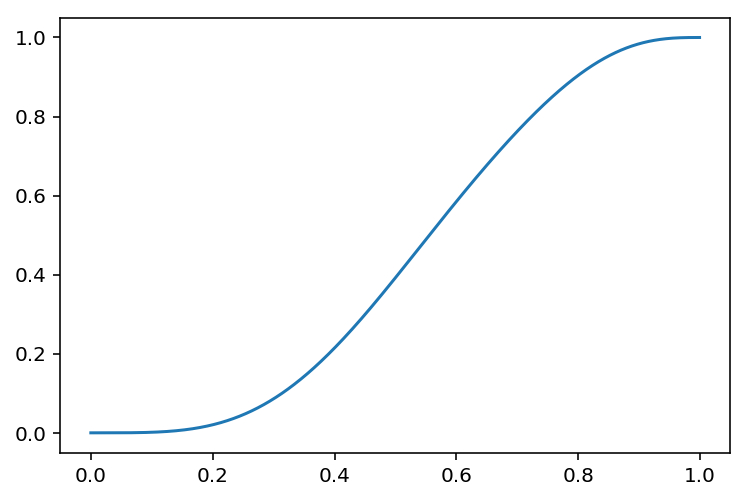

In [47]:
plt.plot(ps, Pgame)

### Badly scaled :(

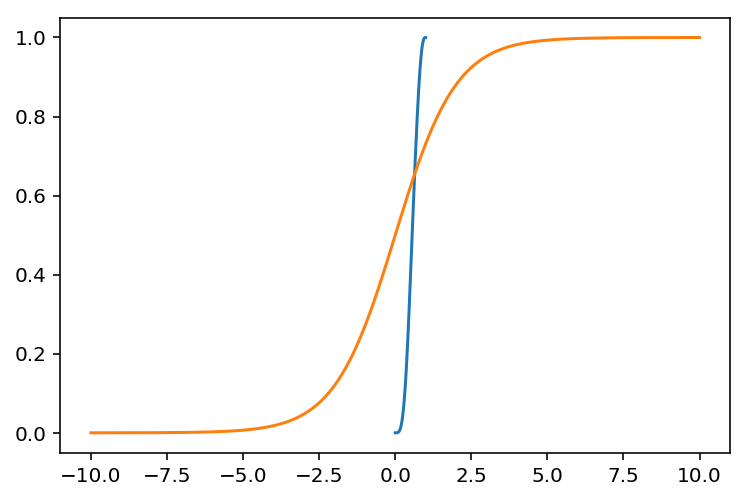

In [49]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))
sx = np.arange(-10,10,0.001)
sps = sigmoid(sx)
plt.plot(ps, Pgame)
plt.plot(sx, sps)